In [1]:
%pip install seaborn

0
361
419
460
537
     Semana  Porcentaje
0  Semana 1       67.23
1   Semana2       78.03
2  Semana 3       85.66
3  Semana 4      100.00


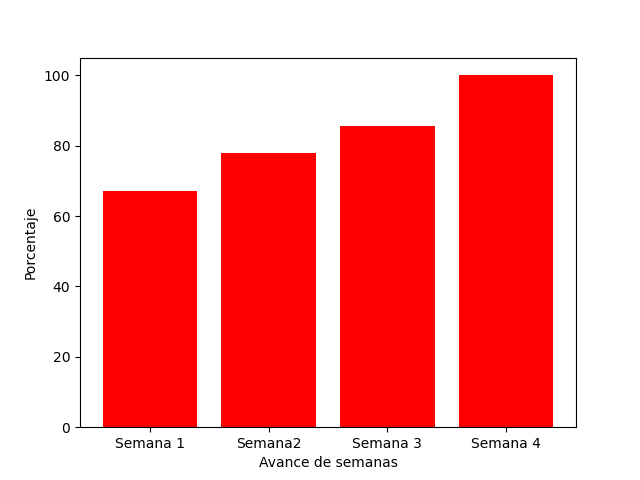

In [157]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

####
#
# Pregunta 1
#

#Se leen los archivos para sacar la información
hoja1 = pd.read_csv('Qatar2022.csv')
# Se consiguen los encabezados de cada columna
header = hoja1.columns.values
hoja2 = pd.read_csv('Qatar2022-221029.csv')
hoja3 = pd.read_csv('Qatar2022-221031.csv')
hoja4 = pd.read_csv('Qatar2022-221104.csv')
hoja5 = pd.read_csv('Qatar2022-221107.csv')

total1 = 0
total2 = 0
total3 = 0
total4 = 0
total5 = 0

# Ciclos para obtener la cantidad todal de psotales obtenidas cada semana
# Se revisa la cantidad de filas
for i in range (0, 32):
    # Se revisa las columnas con postales
    for j in range(2, len(header)):
        # j es la columna a revisar
        # i es la fila a revisar
        total1 += hoja1[header[j]][i]
print(total1)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total2 += hoja2[header[j]][i]
print(total2)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total3 += hoja3[header[j]][i]
print(total3)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total4 += hoja4[header[j]][i]
print(total4)

# Igual que el anterior pero con otro archivo
for i in range (0, 32):
    for j in range(2, len(header)):
        total5 += hoja5[header[j]][i]
print(total5)

semana1 = round((total2)*100/(total5), 2)
semana2 = round((total3)*100/(total5), 2)
semana3 = round((total4)*100/(total5), 2)
semana4 = round(total5*100/(total5), 2)

hoja1 = pd.read_csv('Qatar2022.csv')
header1 = hoja1.columns.values
hoja2 = pd.read_csv('Qatar2022-221107.csv')
header2 = hoja2.columns.values

#####
#
# Gráfico pregunta 1
# ¿Cuántas postales han sido obtenidas en las últimas n semanas?, Cuál es la distribución porcentual por semana?

# Se crea el nuevo dataframe para poder crear el gráfico de barras con las semanas y datos totales obtenidos
data = {'Semana':['Semana 1', 'Semana2', 'Semana 3', 'Semana 4'], 'Porcentaje':[semana1, semana2, semana3, semana4]}
pregunta1 = pd.DataFrame(data)
print(pregunta1)

# Se ingresan las columnas a conseguir información de los ejes "x" y "y" 
plt.bar("Semana", "Porcentaje", data = pregunta1, color = "red")
# Se establecen los nuevos rótulos de los ejes
plt.xlabel("Avance de semanas")
plt.ylabel("Porcentaje")
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 1
> ¿Cuántas postales han sido obtenidas en las últimas n semanas?, Cuál es la distribución porcentual por semana?

Se tienen 5 semanas: en la semana 0 hay 0 postales, en la semana uno son 361, en la semana 2 son 419, en la 4 son 537. De la semana cero a la semana uno, es decir, el lapso de la semana uno se obtuvieron 361 postales. De la semana 1 a la semana 2, es decir el lapso de la semana 2, se obtuvieron 58 postales. De la semana 2 a la semana 3, es decir, el lapso de la semana 3 se obtuvieron 41 postales. De la semana 3 a la semana 4, es decir, el lapso de la semana 4 se obtuvieron 77 postales. Los lapsos anteriores contemplan dos semanas cada uno, y tomando en consideración que se empezó con 0 postales en la semana cero y se terminó con 537 postales en la semana 4 como máximo (100%), los porcentajes asociados a cada lapso son de 67.23, 78.83, 85.66 y 100%; respectivamente.

In [78]:
####
#
# Lógica de las preguntas 2 - 5
#

# Función para conseguir todas las postales del último csv con las postales obtenidas
postales = [] # Lista inicial para guardar los resultados
for i in range(0, 32):
    sumaActual=0 # Contador de la suma actual de la sección
    postales += [[hoja2[header2[0]][i]]] # Se ingresa la sección al cual pertenece la fila
    for j in range(2,len(header2)):
        # Se ingresa el valor de la columna
        sumaActual += hoja2[header2[j]][i]
    # Se almmacena el valor para cambiar de fila
    postales[len(postales)-1].append(sumaActual)

# Función para ordenar de mayor a menor las postales conseguidas previamente
# Primer recorrido de la lista postales
for i in range(len(postales)):
    # Segundo recorrido para verificar
    for j in range(i + 1, len(postales)):
        # Cambio el orden de las postales si una es mayor que la otra
        if postales[i][1] < postales[j][1]:
            # Cambian el orden en la que se encuentran
            postales[i],postales[j]=postales[j],postales[i]

# Top 5 mayor cantidad de postales 
top5 = postales[:5]
# Top 5 menor cantidad de postales
min5 = postales[len(postales)-5:]
print("Top 5 grupos con mayor cantidad: ", top5)
print("Top 5 grupos con menor cantidad: ", min5)

# Función para conseguir todas las postales repetidas del último csv con las postales obtenidas
postalesRepetidas = [] # Lista inicial para guardar los resultados
for i in range (0, 32):
    totalRepetidas = 0 # Contador de la suma actual repetidas de la sección
    postalesRepetidas += [[hoja2[header2[0]][i]]]
    for j in range(2, len(header)):
        if hoja2[header[j]][i] > 1:
            # Se ingresa el valor de la columna -1 por ser repetida (no cuenta la primera postal obtenida)
            totalRepetidas += hoja2[header[j]][i] - 1 
    # Se almmacena el valor para cambiar de fila
    postalesRepetidas[len(postalesRepetidas)-1].append(totalRepetidas)

# Misma función para ordenarlas
# Primer recorrido de la lista postales
for i in range(len(postalesRepetidas)):
    # Segundo recorrido para verificar
    for j in range(i + 1, len(postalesRepetidas)):
        # Cambio el orden de las postales si una es mayor que la otra
        if postalesRepetidas[i][1] < postalesRepetidas[j][1]:
            # Cambian el orden en la que se encuentran
            postalesRepetidas[i],postalesRepetidas[j] = postalesRepetidas[j],postalesRepetidas[i]

# Top 5 mayor cantidad de postales repetidas
top5Rep = postalesRepetidas[:5]
# Top 5 menor cantidad de postales repetidas
min5Rep = postalesRepetidas[len(postalesRepetidas)-5:]
print("Top 5 grupos con mayor cantidad repetida: ", top5Rep)
print("Top 5 grupos con mayor cantidad repetida: ", min5Rep)

Top 5 grupos con mayor cantidad:  [['JPN', 27], ['SEN', 26], ['ECU', 26], ['QAT', 24], ['KSA', 21]]
Top 5 grupos con menor cantidad:  [['SUI', 11], ['URU', 11], ['MAR', 11], ['POR', 9], ['BRA', 9]]
Top 5 grupos con mayor cantidad repetida:  [['JPN', 13], ['ECU', 12], ['SEN', 10], ['KSA', 8], ['CRC', 8]]
Top 5 grupos con mayor cantidad repetida:  [['BEL', 2], ['URU', 2], ['BRA', 2], ['POR', 1], ['SUI', 1]]


  País  Cantidad
0  JPN        27
1  SEN        26
2  ECU        26
3  QAT        24
4  KSA        21


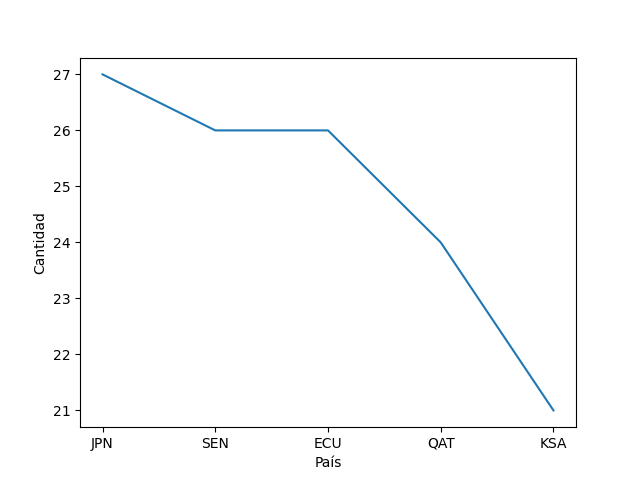

In [147]:
#####
#
# Gráfico pregunta 2
# ¿Cuáles son las 5 secciones que presentan mayor cantidad de postales?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in top5:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta2 = pd.DataFrame(data)
print(pregunta2)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta2)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 2
> ¿Cuáles son las 5 secciones que presentan mayor cantidad de postales?, por grupo?

Se realizó un ordenamiento de mayor a menor cantidad de postales por país y de allí se tomaron los primeros 5 países. Japón (JPN) posee el mayor número de postales (en total: las postales que tengo + las postales repetidas) con 27, luego sigue Senegál (SEN) con 26, Ecuador (ECU) con 26, Quatar (QAT) con 24 y Arabia Saudita (KSA) con 21.

  País  Cantidad
0  SUI        11
1  URU        11
2  MAR        11
3  POR         9
4  BRA         9


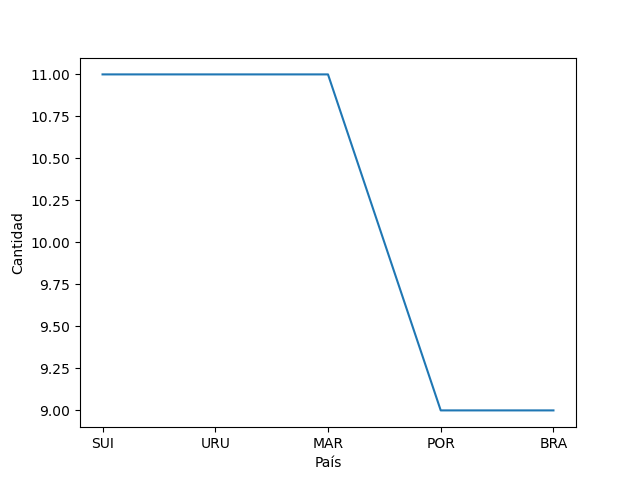

In [146]:
#####
#
# Gráfico pregunta 3
# ¿Cuáles son las 5 secciones que presentan menor cantidad de postales?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in min5:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta3 = pd.DataFrame(data)
print(pregunta3)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta3)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 3
>¿Cuáles son las 5 secciones que presentan menor cantidad de postales?, por grupo?

Se realizó un ordenamiento de mayor a menor cantidad de postales por país y de allí se tomaron los últimos 5 países. Suiza (SUI) posee el quinto menor número de postales (en total: las postales que tengo + las postales repetidas) con 11, luego sigue Uruguay en cuarto (URU) con 11, Marruecos en tercero (MAR) con 11, Portugal de segundo (POR) con 9 y Brazil (BRA) con 9 de primer lugar con la menor cantidad de postales en total.

  País  Cantidad
0  JPN        13
1  ECU        12
2  SEN        10
3  KSA         8
4  CRC         8


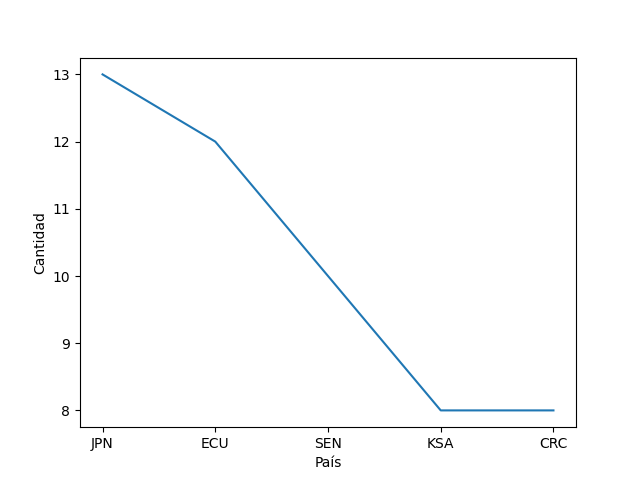

In [145]:
#####
#
# Gráfico pregunta 4
#  ¿Cuáles son las 5 secciones que presentan mayor cantidad total de postales repetidas?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in top5Rep:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta4 = pd.DataFrame(data)
print(pregunta4)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta4)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 4
> ¿Cuáles son las 5 secciones que presentan mayor cantidad total de postales repetidas?, por grupo?

Se realizó un ordenamiento de mayor a menor cantidad de postales repetidas por país y de allí se tomaron los primeros 5 países. Japón (JPN) posee el mayor número de postales repetidas con 13, luego sigue Ecuador (ECU) con 12, Senegal (SEN) con 10, Arabia Saudita (KSA) con 8 y Costa Rica (CRC) con 8.

  País  Cantidad
0  BEL         2
1  URU         2
2  BRA         2
3  POR         1
4  SUI         1


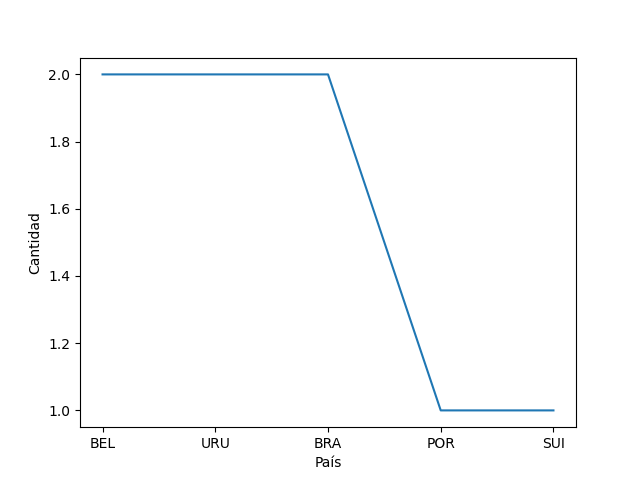

In [144]:
#####
#
# Gráfico pregunta 5
# ¿Cuáles son las 5 secciones que presentan menor cantidad total de postales repetidas?, por grupo?
seccion = [] # Lista del país 
cantidad = [] # Lista de los resultados obtenidos previamente
# Iteración para separar los datos de los resultados obtenidos
for i in min5Rep:
    seccion += [i[0]]
    cantidad += [i[1]] 
# Se preparan los datos para crear el gráfico
data = {'País':seccion, 'Cantidad':cantidad}
pregunta5 = pd.DataFrame(data)
print(pregunta5)
sns.lineplot(x = "País", y = "Cantidad", data=pregunta5)
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 5
> ¿Cuáles son las 5 secciones que presentan menor cantidad total de postales repetidas?, por grupo?

Se realizó un ordenamiento de mayor a menor cantidad de postales repetidas por país y de allí se tomaron los últimos 5 países. Bélgica (BEL) posee el quinto menor número de postales repetidas con 2, luego sigue Uruguay en cuarto (URU) con 2, Brazil en tercero (BRA) con 2, Portugal en segundo (POR) con 1 y Suiza (SUI) en primer lugar con la menor cantidad de postales repetidas con 1.

In [198]:
# #
# Lógica de las preguntas 6 - 10
#

# 7
distribucion = [] # Lista para guardar los resultados
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    distribucion += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del seccion perteneciente de los datos
    for j in range(2, len(header)):
        if hoja2[header[j]][i] == 1: # +1 si lo tiene
            tengo += 1 
        if hoja2[header[j]][i] == 0: # +1 si no lo tiene
            noTengo += 1
        if hoja2[header[j]][i] > 1: # +1 si tiene más de uno
            repetido += 1 
    # Almacenamiento de datos para el cambio de fila
    distribucion[len(distribucion)-1].append(tengo)
    distribucion[len(distribucion)-1].append(noTengo)
    distribucion[len(distribucion)-1].append(repetido)

#6 
# Iteracion para conseguir la cantidad de tengo, no tengo y repetidas para modificar de cada grupo
gruposPorcentuales = [['A',0,0,0],['B',0,0,0],['C',0,0,0],['D',0,0,0],['E',0,0,0],['F',0,0,0],['G',0,0,0],['H',0,0,0]]
for i in distribucion:
    if i[1] == 'A':
        gruposPorcentuales[0][1] += i[2]
        gruposPorcentuales[0][2] += i[3]
        gruposPorcentuales[0][3] += i[4]
    if i[1] == 'B':
        gruposPorcentuales[1][1] += i[2]
        gruposPorcentuales[1][2] += i[3]
        gruposPorcentuales[1][3] += i[4]
    if i[1] == 'C':
        gruposPorcentuales[2][1] += i[2]
        gruposPorcentuales[2][2] += i[3]
        gruposPorcentuales[2][3] += i[4]
    if i[1] == 'D':
        gruposPorcentuales[3][1] += i[2]
        gruposPorcentuales[3][2] += i[3]
        gruposPorcentuales[3][3] += i[4]
    if i[1] == 'E':
        gruposPorcentuales[4][1] += i[2]
        gruposPorcentuales[4][2] += i[3]
        gruposPorcentuales[4][3] += i[4]
    if i[1] == 'F':
        gruposPorcentuales[5][1] += i[2]
        gruposPorcentuales[5][2] += i[3]
        gruposPorcentuales[5][3] += i[4]
    if i[1] == 'G':
        gruposPorcentuales[6][1] += i[2]
        gruposPorcentuales[6][2] += i[3]
        gruposPorcentuales[6][3] += i[4]
    if i[1] == 'H':
        gruposPorcentuales[7][1] += i[2]
        gruposPorcentuales[7][2] += i[3]
        gruposPorcentuales[7][3] += i[4]

# Iteracion para conseguir el total de tengo, no tengo y repetida de cada grupo
gruposPorcentualesTotales = [0,0,0]
for i in gruposPorcentuales:
    gruposPorcentualesTotales[0] += i[1]
    gruposPorcentualesTotales[1] += i[2]
    gruposPorcentualesTotales[2] += i[3]

# Iteracion para conseguir los procentajes de tengo, no tengo y repetidas de cada grupo
for i in gruposPorcentuales:
    i[1] = round(100*i[1]/gruposPorcentualesTotales[0],2)
    i[2] = round(100*i[2]/gruposPorcentualesTotales[1],2)
    i[3] = round(100*i[3]/gruposPorcentualesTotales[2],2)

# Iteracion para convertir la cantidad de tengo, no tengo y repetidas de cada seccion en porcentaje 
for i in distribucion:
    i[2] = round(i[2]*100/19, 2)
    i[3] = round(i[3]*100/19, 2)
    i[4] = round(i[4]*100/19, 2)

#8
escudos = [] # Lista para guardar los resultados
totalRepetidos = 0 # Contador de postales totales
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    escudos += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del grupo y seccion perteneciente de los datos
    if hoja2[header[2]][i] == 1:
        tengo += 1 
    if hoja2[header[2]][i] == 0:
        noTengo += 1
    if hoja2[header[2]][i] > 1:
        totalRepetidos += 1
        repetido += hoja2[header[2]][i] - 1
        tengo += 1
    
    # Almacenamiento de datos para el cambio de fila
    escudos[len(escudos)-1].append(tengo)
    escudos[len(escudos)-1].append(noTengo)
    escudos[len(escudos)-1].append(repetido)

# Iteracion para sacar los porcentajes de los escudos
for i in escudos:
    i[2] = round(i[2]*100/32, 2)
    i[3] = round(i[3]*100/32, 2)
    i[4] = round(i[4]*100/totalRepetidos, 2)

# 9
porteros = [] # Lista para guardar los resultados
totalPorteros = 0 # Contador de porteros totales
for i in range (0, 32):
    # Conteo de los datos obtenidos
    tengo = 0
    noTengo = 0
    repetido = 0
    porteros += [[hoja2[header2[0]][i], hoja2[header2[1]][i]]] # Separador del grupo perteneciente de los datos
    if hoja2[header[3]][i] == 1:
        tengo += 1 
    if hoja2[header[3]][i] == 0:
        noTengo += 1
    if hoja2[header[3]][i] > 1:
        tengo += 1
        repetido += hoja2[header[3]][i] - 1
        totalPorteros += 1
    if hoja2[header[4]][i] == 1:
        tengo += 1 
    if hoja2[header[4]][i] == 0:
        noTengo += 1
    if hoja2[header[4]][i] > 1:
        tengo += 1
        repetido += hoja2[header[4]][i] - 1
        totalPorteros += 1
    # Almacenamiento de datos para el cambio de fila
    porteros[len(porteros)-1].append(tengo)
    porteros[len(porteros)-1].append(noTengo)
    porteros[len(porteros)-1].append(repetido)

for i in porteros:
    i[2] = round(i[2]*100/64, 2)
    i[3] = round(i[3]*100/64, 2)
    i[4] = round(i[4]*100/totalPorteros, 2)
    
#10
jugadores = [0,0,0,0,0] # Lista para modificar si se encontró o no
# Se busca por fila y columna si se posee el jugador 
for i in range (0, 32):
    for j in range(2, len(header)):
        # Lionel Messi
        if hoja2[header[20]][8] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[0] = 1
        # Cristiano Ronaldo
        if hoja2[header[18]][28] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[1] = 1
        # Mbappe
        if hoja2[header[19]][12] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[2] = 1
        # Karim Benzema
        if hoja2[header[16]][12] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[3] = 1
        # Neymar
        if hoja2[header[17]][24] == 1 or hoja2[header[20]][8] > 1 :
            jugadores[4] = 1

  Grupo  Tengo  No tengo  Repetida
0     A  13.25      6.75     21.17
1     B  11.97     12.66     13.14
2     C  11.54     13.50     12.41
3     D  14.10     11.81     10.95
4     E  12.39     10.97     15.33
5     F  11.11     15.19     10.22
6     G  12.82     14.77      8.03
7     H  12.82     14.35      8.76


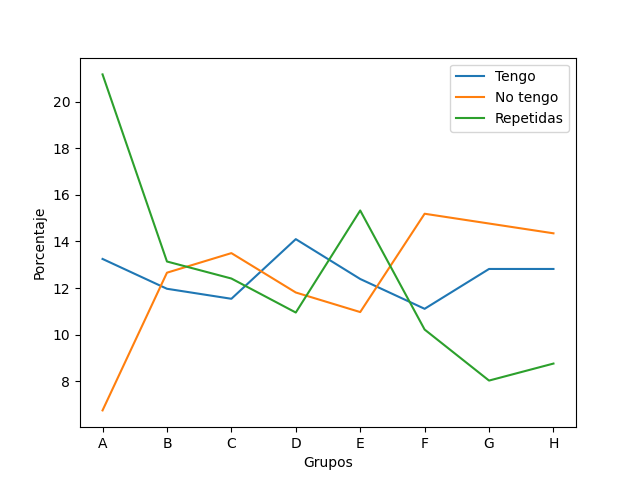

In [150]:
####
#
# Preguntas 6
# ¿Cual es la distribución porcentual de postales (la tengo, no la tengo, la tengo repetida) para un grupo dado?. Se debe leer el grupo.
# 

grupos = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in gruposPorcentuales:
    grupos += [i[0]]
    distribucionTengo += [i[1]]
    distribucionNoTengo += [i[2]]
    distribucionRepetido += [i[3]]

data = {'Grupo':grupos, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta6 = pd.DataFrame(data)
print(pregunta6)

sns.lineplot(x = "Grupo", y = "Tengo", data=pregunta6, label = "Tengo")
sns.lineplot(x = "Grupo", y = "No tengo", data=pregunta6, label = "No tengo")
sns.lineplot(x = "Grupo", y = "Repetida", data=pregunta6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupos")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 6
> ¿Cual es la distribución porcentual de postales (la tengo, no la tengo, la tengo repetida) para un grupo dado?. Se debe leer el grupo.

La distribución porcentual de postales de la tengo, no la tengo, la tengo repetida, para el grupo A corresponde respectivamente a 13.25, 6.75 y 21.17; para el grupo B es de 11.97, 12.66 y 13.14; para el grupo C de 11.54, 13.50 y 12.41; para el grupo D de 14.10, 11.81 y 18.95; para el grupo E de 12.39, 10.97 y 15.33; para el grupo F de 11.11, 15.19 y 10.22; para el grupo G de 12.82, 14.77 y 8.93; y para el grupo H de 12.82, 14.35 y 8.76

  País  Tengo  No tengo  Repetida
0  QAT  57.89     10.53     31.58
1  ECU  21.05     26.32     52.63
2  SEN  47.37     15.79     36.84
3  NED  36.84     31.58     31.58


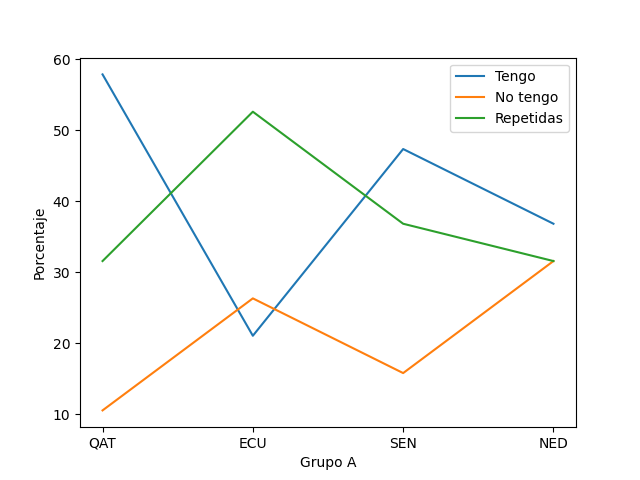

In [141]:
####
#
# Preguntas 7.1 = Grupo A
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_1 = pd.DataFrame(data)
print(pregunta7_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7
> ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida)
por sección?. Se debe leer la sección

La distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección resultó ser muy grande para un solo gráfico, por lo que se dividió por grupo, de forma que cada uno mostrara sus 4 secciones.

# Pregunta 7.1
> Grupo A

Para el grupo A por sección se muestran las distribuciones anteriores respectivamente: Quatar (QAT) - 57.98, 18.53 y 31.58, Ecuador (ECU) - 21.05, 26.32 y 52.63, Senegal (SEN) - 47.37, 15.79 y 36.84, y Países Bajos (NED) - 36.84, 31.58 y 31.58.

  País  Tengo  No tengo  Repetida
0  ENG  26.32     36.84     36.84
1  IRN  31.58     42.11     26.32
2  USA  47.37     36.84     15.79
3  WAL  42.11     42.11     15.79


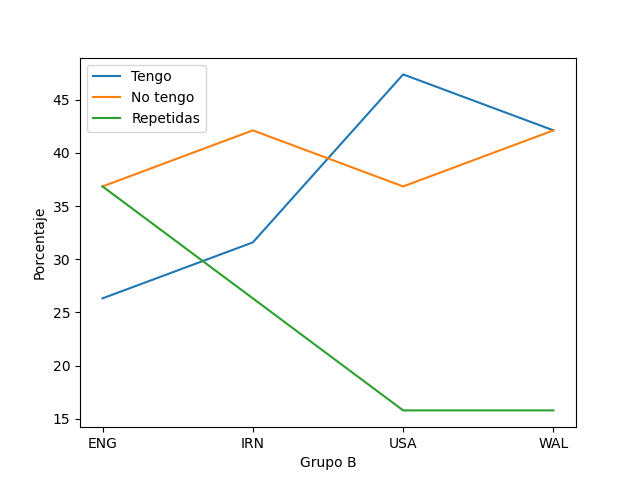

In [140]:
####
#
# Preguntas 7.2 = Grupo B
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_2 = pd.DataFrame(data)
print(pregunta7_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.2
> Grupo B

Para el grupo B por sección se muestran las distribuciones anteriores respectivamente: Inglaterra (ENG) - 26.32, 36.84 y 36.84, Irán (IRN) - 31.58, 42.11 y 26.32, Estados Unidos (USA) - 47.37, 36.84 y 15.79, y Gales (WAL) - 42.11, 42.11 y 15.79.

  País  Tengo  No tengo  Repetida
0  ARG  36.84     47.37     15.79
1  KSA  36.84     31.58     31.58
2  MEX  26.32     47.37     26.32
3  POL  42.11     42.11     15.79


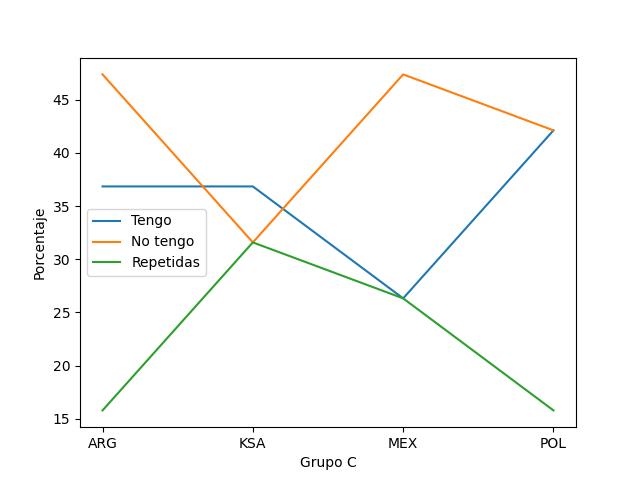

In [151]:
####
#
# Preguntas 7.3 = Grupo C
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_3 = pd.DataFrame(data)
print(pregunta7_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.3
> Grupo C

Para el grupo C por sección se muestran las distribuciones anteriores respectivamente: Argentina (ARG) - 36.84, 47.37 y 15.79, Arabia Saudita (KSA) - 36.84, 31.58 y 31.58, México (MEX) - 26.32, 47.37 y 26.32, y Polonia (POL) - 42.11, 42.11 y 15.79.

  País  Tengo  No tengo  Repetida
0  FRA  57.89     26.32     15.79
1  AUS  47.37     26.32     26.32
2  DEN  36.84     47.37     15.79
3  TUN  31.58     47.37     21.05


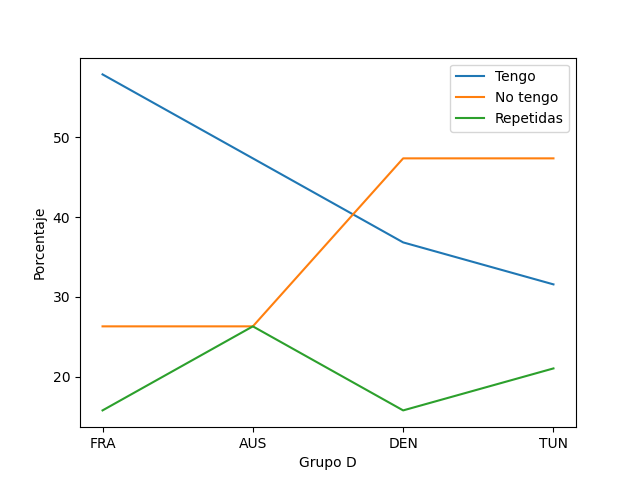

In [139]:
####
#
# Preguntas 7.4 = Grupo D
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_4 = pd.DataFrame(data)
print(pregunta7_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.4 
> Grupo D

Para el grupo D por sección se muestran las distribuciones anteriores respectivamente: Francia (FRA) - 57.89, 26.32 y 15.79, Australia (AUS) - 47.37, 26.32 y 26.32, Dinamarca (DEN) - 36.84, 47.37 y 15.79, y Túnez (TUN) - 31.58, 47.37 y 21.05.

  País  Tengo  No tengo  Repetida
0  ESP  36.84     36.84     26.32
1  CRC  31.58     36.84     31.58
2  GER  52.63     36.84     10.53
3  JPN  31.58     26.32     42.11


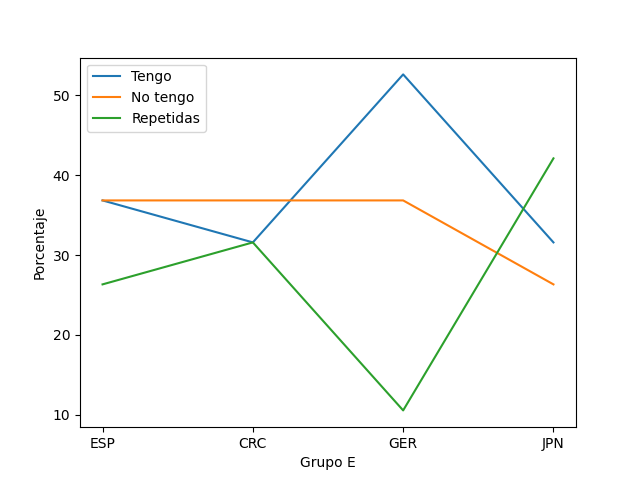

In [138]:
####
#
# Preguntas 7.5 = Grupo E
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_5 = pd.DataFrame(data)
print(pregunta7_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.5
> Grupo E

Para el grupo E por sección se muestran las distribuciones anteriores respectivamente: España (ESP) - 36.84, 36.84 y 26.32, Costa Rica (CRC) - 31.58, 36.84 y 31.58, Alemania (GER) - 52.63, 36.84 y 10.53, y Japón (JPN) - 31.58, 26.32 y 42.11.

  País  Tengo  No tengo  Repetida
0  BEL  42.11     47.37     10.53
1  CAN  21.05     52.63     26.32
2  MAR  36.84     52.63     10.53
3  CRO  36.84     36.84     26.32


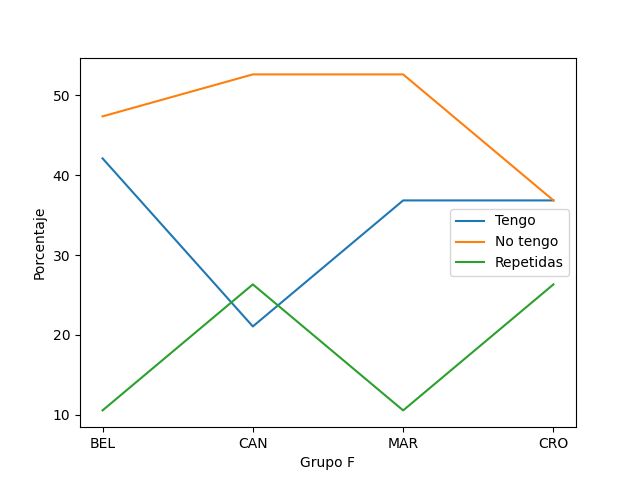

In [137]:
####
#
# Preguntas 7.6 = Grupo F
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_6 = pd.DataFrame(data)
print(pregunta7_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.6
> Grupo F

Para el grupo F por sección se muestran las distribuciones anteriores respectivamente: Bélgica (BEL) - 42.11, 47.37 y 10.53, Canadá (CAN) - 21.05, 52.63 y 26.32, Marruecos (MAR) - 36.84, 52.63 y 10.53, y Croacia (CRO) - 36.84, 36.84 y 26.32.

  País  Tengo  No tengo  Repetida
0  BRA  26.32     63.16     10.53
1  SRB  42.11     36.84     21.05
2  SUI  47.37     47.37      5.26
3  CMR  42.11     36.84     21.05


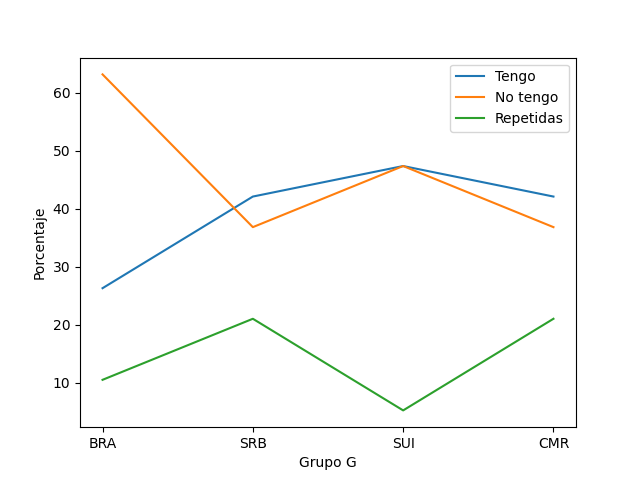

In [136]:
####
#
# Preguntas 7.7 = Grupo G
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_7 = pd.DataFrame(data)
print(pregunta7_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.7
> Grupo G

Para el grupo G por sección se muestran las distribuciones anteriores respectivamente: Brazil (BRA) - 26.32, 63.16 y 10.53, Serbia (SRB) - 42.11, 36.84 y 21.05, Suiza (SUI) - 47.37, 47.37 y 5.26, y Camerún (CMR) - 42.11, 36.84 y 21.05.

  País  Tengo  No tengo  Repetida
0  POR  36.84     57.89      5.26
1  GHA  42.11     36.84     21.05
2  URU  36.84     52.63     10.53
3  KOR  42.11     31.58     26.32


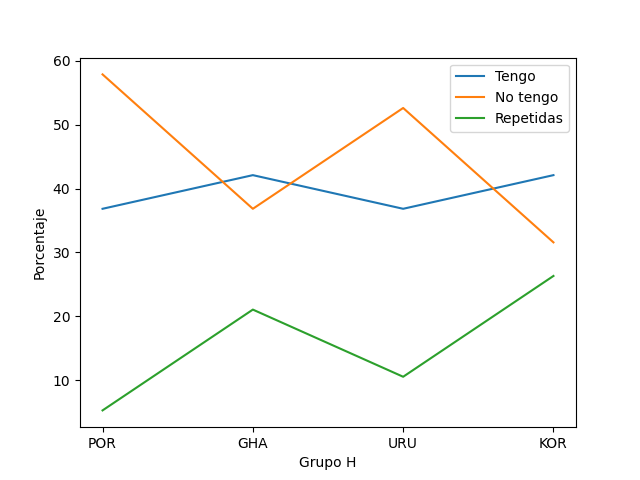

In [135]:
####
#
# Preguntas 7.8 = Grupo H
# ¿Cuál es la distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) por sección?. Se debe leer la sección

seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in distribucion:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta7_8 = pd.DataFrame(data)
print(pregunta7_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta7_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta7_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta7_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 7.8
> Grupo H

Para el grupo H por sección se muestran las distribuciones anteriores respectivamente: Portugal (POR) - 36.84, 57.89 y 5.26, Gana (GHA) - 42.11, 36.84 y 21.05, Uruguay (URU) - 36.84, 52.63 y 10.53, y Korea (KOR) - 42.11, 31.58 y 26.32.

  País  Tengo  No tengo  Repetida
0  QAT   3.12       0.0      0.00
1  ECU   3.12       0.0     16.67
2  SEN   3.12       0.0      0.00
3  NED   3.12       0.0      0.00


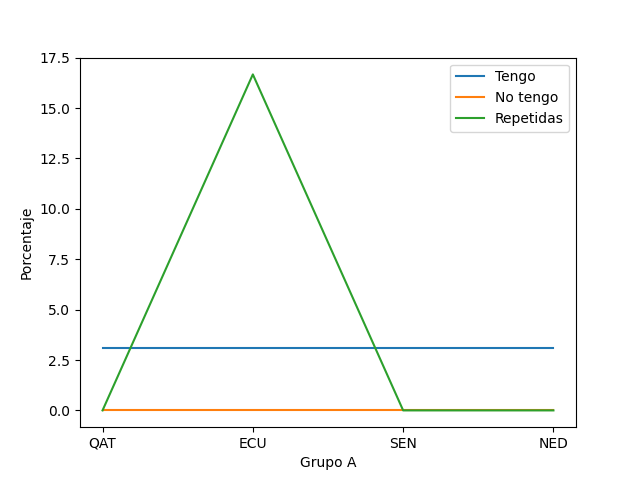

In [175]:
####
#
# Preguntas 8.1 = Grupo A
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_1 = pd.DataFrame(data)
print(pregunta8_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8
> ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?

Tomando como 32 el 100% de los escudos, con 1 por país. Si un país tiene 1 escudo, posee un 3.12% de este 100%. Con respecto a las postales repetidas, se calcularon solamente las postales repetidas de los escudos (no se toman en cuenta las repetidas de los jugadores ni porteros) y la cantidad de postales repetidas que tenga cada país va a corresponder al porcentaje de repetidas que posea de este subtotal.

La distribución porcentual de las postales (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección) por sección resultó ser muy grande para un solo gráfico, por lo que se dividió por grupo, de forma que cada uno mostrara sus 4 secciones.

# Pregunta 8.1
> Grupo A

Para el grupo A por sección se muestran las distribuciones anteriores respectivamente: Quatar (QAT) - 3.12, 0 y 0, Ecuador (ECU) - 3.12, 0 y 16.67, Senegal (SEN) - 3.12, 0 y 0, y Noruega (NOR) 3.12, 0 y 0.

  País  Tengo  No tengo  Repetida
0  ENG   3.12      0.00     16.67
1  IRN   0.00      3.12      0.00
2  USA   3.12      0.00      0.00
3  WAL   0.00      3.12      0.00


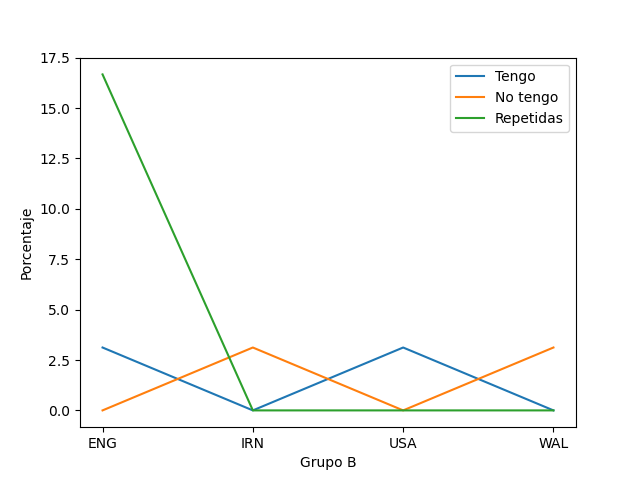

In [176]:
####
#
# Preguntas 8.2 Grupo B
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_2= pd.DataFrame(data)
print(pregunta8_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.2
> Grupo B

Para el grupo B por sección se muestran las distribuciones anteriores respectivamente: Inglaterra (ENG) - 3.12, 0 y 16.67, Irán (IRN) - 0, 3.12 y 0, Estados Unidos (USA) - 3.12, 0 y 0, y Gales (WAL) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  ARG   3.12      0.00      0.00
1  KSA   3.12      0.00     33.33
2  MEX   0.00      3.12      0.00
3  POL   0.00      3.12      0.00


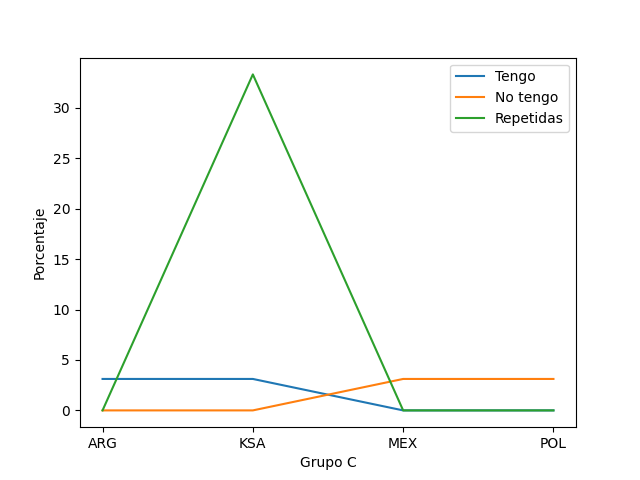

In [177]:
####
#
# Preguntas 8.3 Grupo C
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_3= pd.DataFrame(data)
print(pregunta8_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.3
> Grupo C

Para el grupo C por sección se muestran las distribuciones anteriores respectivamente: Argentina (ARG) - 3.12, 0 y 0, Arabia Saudita (KSA) - 3.12, 0 y 33.33, México (MEX) - 0, 3.12 y 0, y Polonia (POL) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  FRA   0.00      3.12       0.0
1  AUS   3.12      0.00       0.0
2  DEN   3.12      0.00       0.0
3  TUN   0.00      3.12       0.0


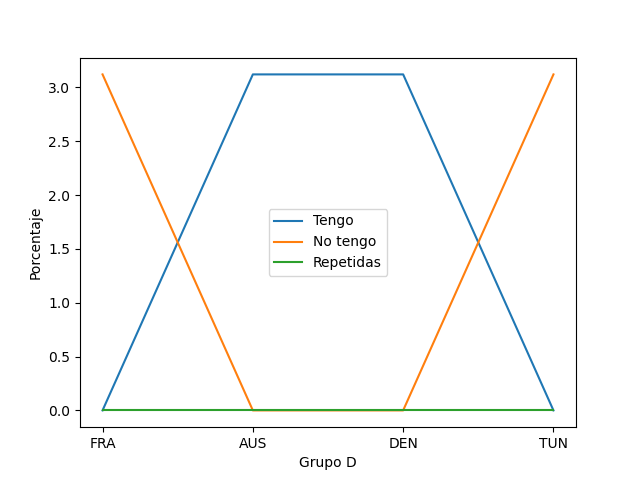

In [179]:
####
#
# Preguntas 8.4 Grupo D
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_4= pd.DataFrame(data)
print(pregunta8_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.4
> Grupo D

Para el grupo D por sección se muestran las distribuciones anteriores respectivamente: Francia (FRA) - 0, 3.12 y 0, Australia (AUS) - 3.12, 0 y 0, Dinamarca (DEN) - 3.12, 0 y 0, y Túnez (TUN) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  ESP   3.12      0.00      0.00
1  CRC   0.00      3.12      0.00
2  GER   3.12      0.00     16.67
3  JPN   3.12      0.00      0.00


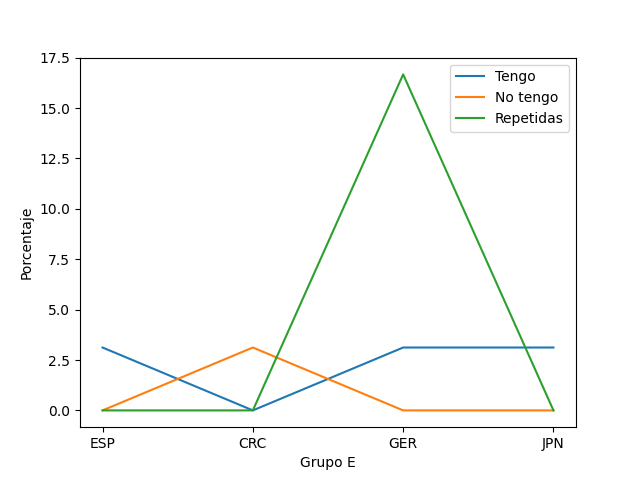

In [180]:
####
#
# Preguntas 8.5 Grupo E
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_5= pd.DataFrame(data)
print(pregunta8_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.5
> Grupo E

Para el grupo E por sección se muestran las distribuciones anteriores respectivamente: España (ESP) - 3.12, 0 y 0, Costa Rica (CRC) - 0, 3.12 y 0, Alemania (GER) - 3.12, 0 y 16.67, y Japón (JPN) - 3.12, 0 y 0

  País  Tengo  No tengo  Repetida
0  BEL   0.00      3.12      0.00
1  CAN   3.12      0.00     16.67
2  MAR   3.12      0.00      0.00
3  CRO   0.00      3.12      0.00


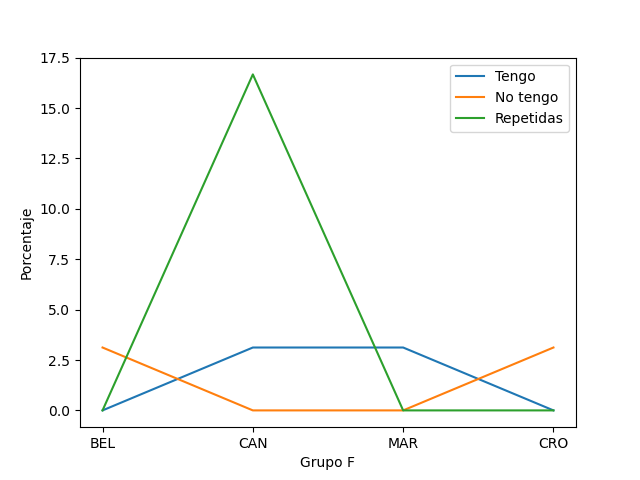

In [181]:
####
#
# Preguntas 8.6 Grupo F
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_6= pd.DataFrame(data)
print(pregunta8_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.6
> Grupo F

Para el grupo F por sección se muestran las distribuciones anteriores respectivamente: Bélgica (BEL) - 0, 3.12 y 0, Canadá (CAN) - 3.12, 0 y 16.67, Marruecos (MAR) - 3.12, 0 y 0, y Croacia (CRO) - 0, 3.12 y 0

  País  Tengo  No tengo  Repetida
0  BRA   3.12      0.00     16.67
1  SRB   0.00      3.12      0.00
2  SUI   0.00      3.12      0.00
3  CMR   3.12      0.00      0.00


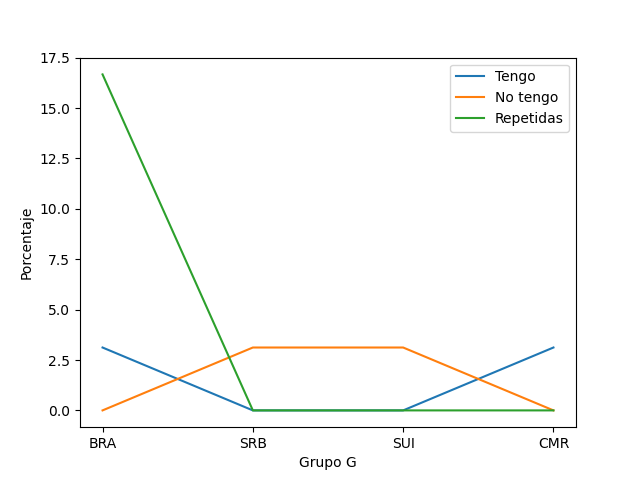

In [182]:
####
#
# Preguntas 8.7 Grupo G
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_7= pd.DataFrame(data)
print(pregunta8_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.7 
> Grupo G

Para el grupo G por sección se muestran las distribuciones anteriores respectivamente: Brazil (BRA) - 3.12, 0 y 16.67, Serbia (SRB) - 0, 3.12 y 0, Suiza (SUI) - 0, 3.12 y 0, y Camerún (CMR) - 3.12, 0 y 0.

  País  Tengo  No tengo  Repetida
0  POR   0.00      3.12       0.0
1  GHA   3.12      0.00       0.0
2  URU   0.00      3.12       0.0
3  KOR   3.12      0.00       0.0


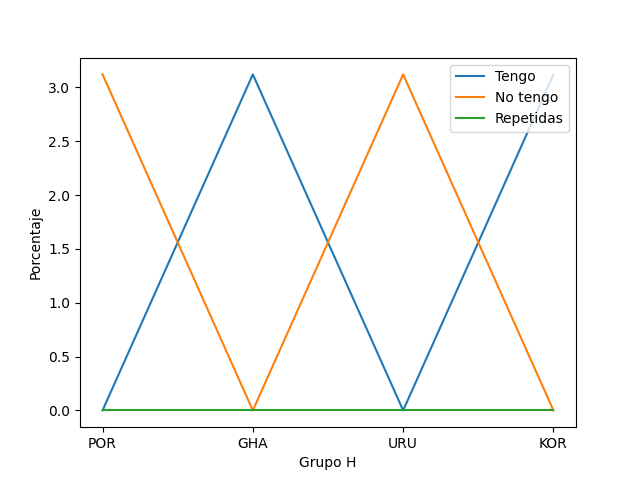

In [183]:
####
#
# Preguntas 8.8 Grupo H
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, la tengo repetida) con respecto al escudo (postal 1 de cada sección)?
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in escudos:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta8_8= pd.DataFrame(data)
print(pregunta8_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta8_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta8_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta8_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 8.8
> Grupo H

Para el grupo H por sección se muestran las distribuciones anteriores respectivamente: Portugal (POR) - 0, 3.12 y 0, Gana (GHA) - 3.12, 0 y 0, Uruguay (URU) - 0, 3.12 y 0, y Korea (KOR) - 3.12, 0 y 0.

  País  Tengo  No tengo  Repetida
0  QAT   3.12      0.00       5.0
1  ECU   1.56      1.56       0.0
2  SEN   3.12      0.00       5.0
3  NED   1.56      1.56       5.0


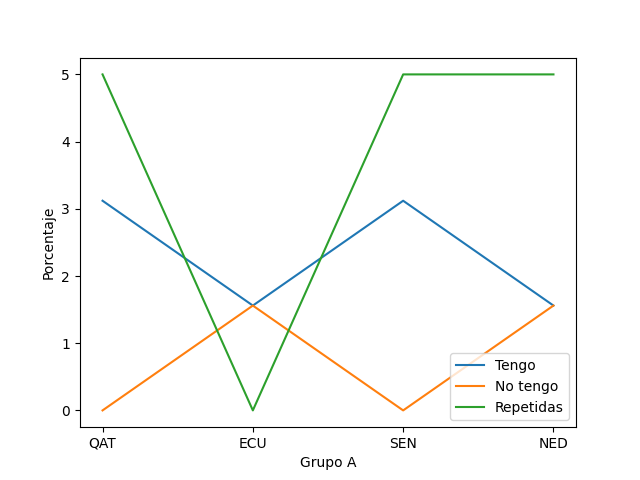

In [199]:
####
#
# Preguntas 9.1 Grupo A
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'A':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_1= pd.DataFrame(data)
print(pregunta9_1)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_1, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_1, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_1, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo A")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9
> ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 

Tomando como 64 el 100% de los porteros, con 2 por país. Si un país tiene los 2 porteros posee un 3.12% de este 100% y si tiene solo uno de los dos sería 1.56%. Con respecto a las postales repetidas, se calcularon todas las postales repetidas (100% de las repetidas) y la cantidad de postales repetidas que tenga cada país va a corresponder al porcentaje de repetidas que posea de este total.


La distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección) por sección resultó ser muy grande para un solo gráfico, por lo que se dividió por grupo, de forma que cada uno mostrara sus 4 secciones.

# Pregunta 9.1
> Grupo A

Para el grupo A por sección se muestran las distribuciones anteriores respectivamente: Quatar (QAT) - 3.12, 0 y 5, Ecuador (ECU) - 1.56, 1.56 y 0, Senegal (SEN) - 3.12, 0 y 5, y Noruega (NOR) 1.56, 1.56 y 5.

  País  Tengo  No tengo  Repetida
0  ENG   3.12      0.00       5.0
1  IRN   1.56      1.56       5.0
2  USA   3.12      0.00       5.0
3  WAL   0.00      3.12       0.0


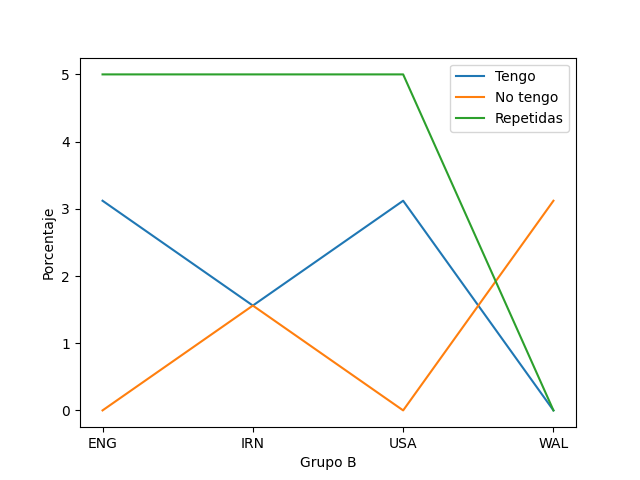

In [200]:
####
#
# Preguntas 9.2 Grupo B
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'B':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_2= pd.DataFrame(data)
print(pregunta9_2)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_2, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_2, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_2, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo B")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.2
> Grupo B

Para el grupo B por sección se muestran las distribuciones anteriores respectivamente: Inglaterra (ENG) - 3.12, 0 y 5, Irán (IRN) - 1.56, 1.56 y 5, Estados Unidos (USA) - 3.12, 0 y 5, y Gales (WAL) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  ARG   1.56      1.56       5.0
1  KSA   3.12      0.00      10.0
2  MEX   1.56      1.56       0.0
3  POL   1.56      1.56       0.0


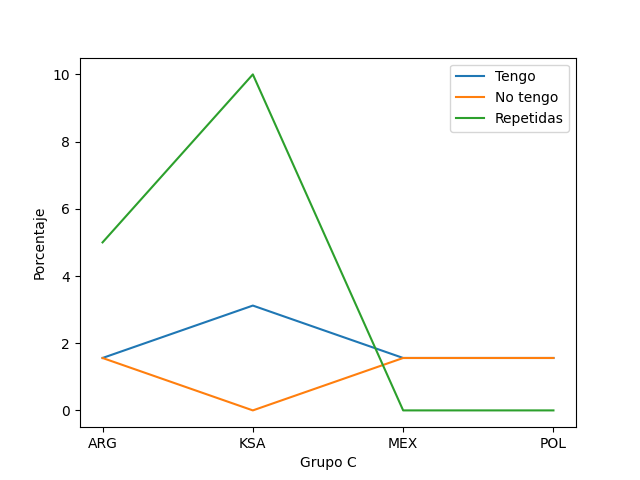

In [201]:
####
#
# Preguntas 9.3 Grupo C
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'C':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_3= pd.DataFrame(data)
print(pregunta9_3)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_3, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_3, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_3, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo C")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.3
> Grupo C

Para el grupo C por sección se muestran las distribuciones anteriores respectivamente: Argentina (ARG) - 1.56, 1.56 y 5, Arabia Saudita (KSA) - 3.12, 0 y 10, México (MEX) - 1.56, 1.56 y 0, y Polonia (POL) - 1.56, 1.56 y 0.

  País  Tengo  No tengo  Repetida
0  FRA   1.56      1.56       0.0
1  AUS   3.12      0.00      10.0
2  DEN   3.12      0.00      15.0
3  TUN   0.00      3.12       0.0


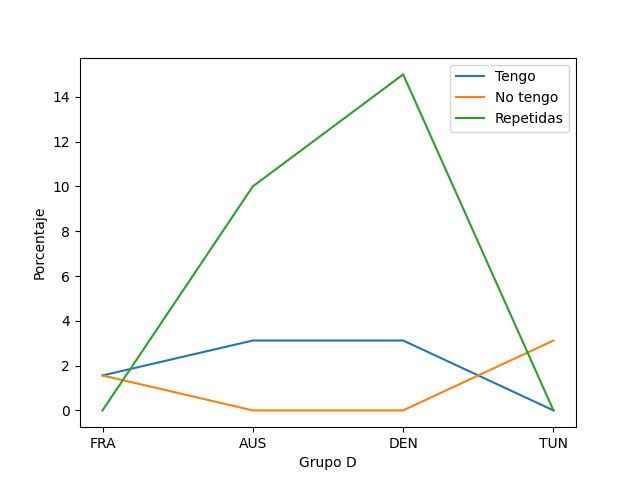

In [202]:
####
#
# Preguntas 9.4 Grupo D
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'D':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_4= pd.DataFrame(data)
print(pregunta9_4)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_4, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_4, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_4, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo D")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.4
> Grupo D

Para el grupo D por sección se muestran las distribuciones anteriores respectivamente: Francia (FRA) - 1.56, 1.56 y 0, Australia (AUS) - 3.12, 0 y 10, Dinamarca (DEN) - 3.12, 0 y 15, y Túnez (TUN) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  ESP   3.12      0.00       5.0
1  CRC   3.12      0.00       0.0
2  GER   1.56      1.56       0.0
3  JPN   3.12      0.00      10.0


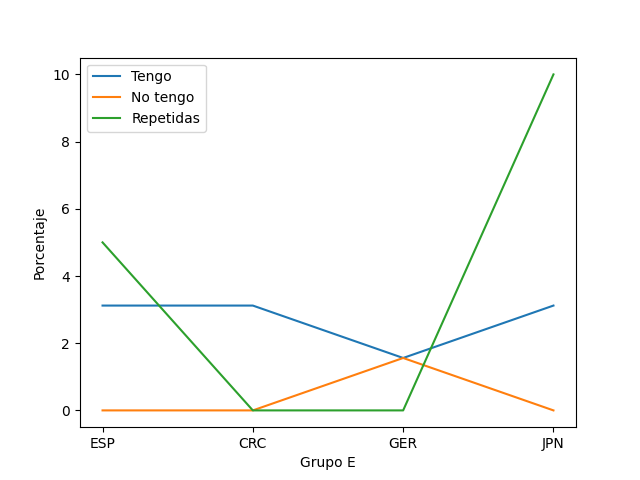

In [203]:
####
#
# Preguntas 9.5 Grupo E
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'E':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_5= pd.DataFrame(data)
print(pregunta9_5)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_5, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_5, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_5, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo E")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.5
> Grupo E

Para el grupo E por sección se muestran las distribuciones anteriores respectivamente: España (ESP) - 3.12, 0 y 5, Costa Rica (CRC) - 3.12, 0 y 0, Alemania (GER) - 1.56, 1.56 y 0, y Japón (JPN) - 3.12, 0 y 10.

  País  Tengo  No tengo  Repetida
0  BEL   1.56      1.56       0.0
1  CAN   3.12      0.00      10.0
2  MAR   1.56      1.56       0.0
3  CRO   1.56      1.56       0.0


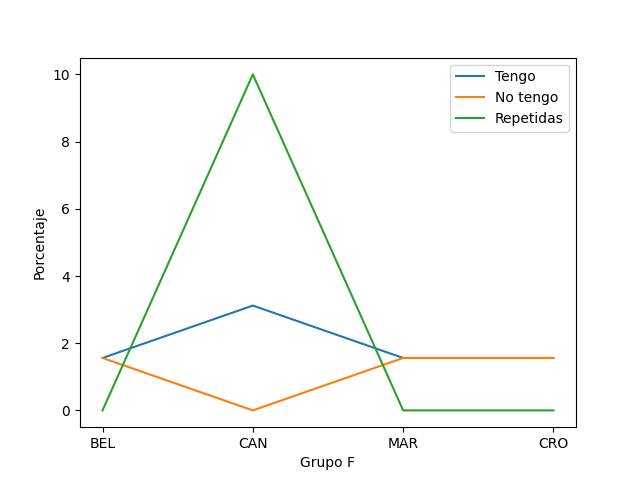

In [204]:
####
#
# Preguntas 9.6 Grupo F
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'F':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_6= pd.DataFrame(data)
print(pregunta9_6)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_6, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_6, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_6, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo F")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.6
> Grupo F

Para el grupo F por sección se muestran las distribuciones anteriores respectivamente: Bélgica (BEL) - 1.56, 1.56 y 0, Canadá (CAN) - 3.12, 0 y 10, Marruecos (MAR) - 1.56, 1.56 y 0, y Croacia (CRO) - 1.56, 1.56 y 0.

  País  Tengo  No tengo  Repetida
0  BRA   3.12      0.00       5.0
1  SRB   1.56      1.56       0.0
2  SUI   1.56      1.56       0.0
3  CMR   0.00      3.12       0.0


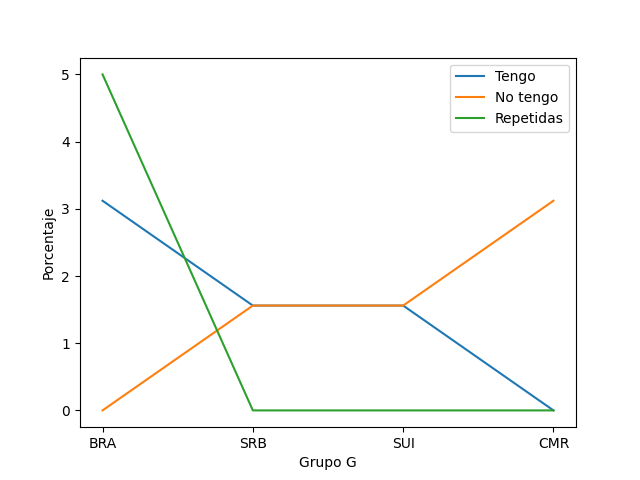

In [205]:
####
#
# Preguntas 9.7 Grupo G
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'G':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_7= pd.DataFrame(data)
print(pregunta9_7)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_7, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_7, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_7, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo G")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.7
> Grupo G

Para el grupo G por sección se muestran las distribuciones anteriores respectivamente: Brazil (BRA) - 3.12, 0 y 5, Serbia (SRB) - 1.56, 1.56 y 0, Suiza (SUI) - 1.56, 1.56 y 0, y Camerún (CMR) - 0, 3.12 y 0.

  País  Tengo  No tengo  Repetida
0  POR   1.56      1.56       0.0
1  GHA   3.12      0.00       5.0
2  URU   3.12      0.00       0.0
3  KOR   1.56      1.56       5.0


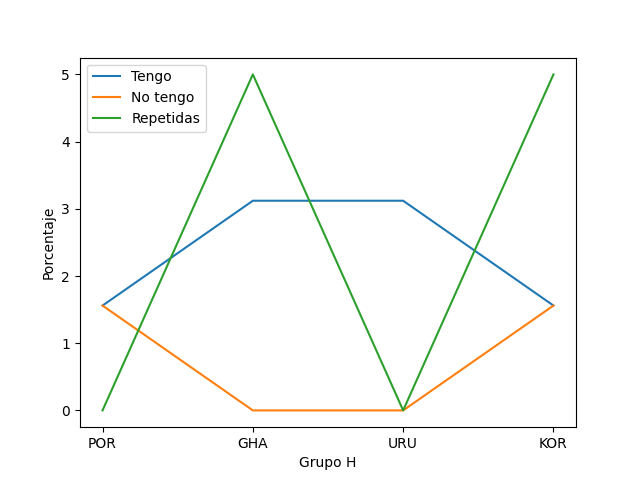

In [206]:
####
#
# Preguntas 9.8 Grupo H
#  ¿Cuál es la distribución porcentual de las secciones (la tengo, no la tengo, las tengo repetidas) con respecto a sus porteros (postales 2 y 3 de cada sección)? 
seccion = []
distribucionTengo = []
distribucionNoTengo = []
distribucionRepetido = []
for i in porteros:
    if i[1] == 'H':
        seccion += [i[0]]
        distribucionTengo += [i[2]]
        distribucionNoTengo += [i[3]]
        distribucionRepetido += [i[4]]

data = {'País':seccion, 'Tengo':distribucionTengo, 'No tengo': distribucionNoTengo, 'Repetida': distribucionRepetido}
pregunta9_8= pd.DataFrame(data)
print(pregunta9_8)

sns.lineplot(x = "País", y = "Tengo", data=pregunta9_8, label = "Tengo")
sns.lineplot(x = "País", y = "No tengo", data=pregunta9_8, label = "No tengo")
sns.lineplot(x = "País", y = "Repetida", data=pregunta9_8, label = "Repetidas")
plt.ylabel("Porcentaje")
plt.xlabel("Grupo H")

# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 9.8
> Grupo H

Para el grupo H por sección se muestran las distribuciones anteriores respectivamente: Portugal (POR) - 1.56, 1.56 y 0, Gana (GHA) - 3.12, 0 y 5, Uruguay (URU) - 3.12, 0 y 0, y Korea (KOR) - 1.56, 1.56 y 5.

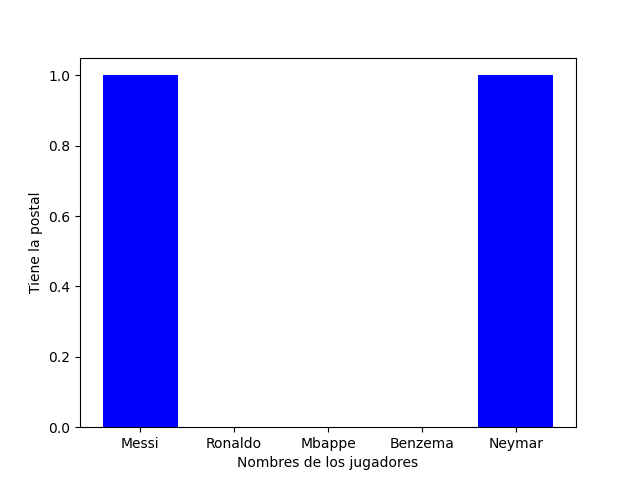

In [174]:
####
#
# Preguntas 10
# ¿Se cuenta con las postales de Leonel Messi, Cristiano Ronaldo, Mbappe, Karim Benzema, Neymar?.

# Lista con los nombres de los jugadores a buscar
jugadoresNombres = ["Messi", "Ronaldo", "Mbappe", "Benzema", "Neymar"] 

# Nuevo dataframe para el gráfico
data = {'Jugadores':jugadoresNombres, 'Tiene':jugadores}
pregunta10 = pd.DataFrame(data)

plt.bar("Jugadores", "Tiene", data = pregunta10, color = "blue")
plt.ylabel("Tiene la postal")
plt.xlabel("Nombres de los jugadores")
# Habilita la visibilidad de los graficos una vez declarados
plt.show()

# Pregunta 10
> ¿Se cuenta con las postales de Leonel Messi, Cristiano Ronaldo, Mbappe, Karim Benzema, Neymar?

Se cuenta con las postales de Leonel Messi, y Neymar. Pero no se cuenta con las postales de Cristiano Ronaldo, Mbappe ni Karim Benzema.